# Health Analytics

### Prever o tempo de sobrevivência dos pacientes após receberem um Transplante de Fígado.

#### **Nota:** 
O conteúdo deste projeto analítico foi feito com apoio de uma pessoa que conhece a área da saúde. Pois é importante que o Analista ou Cientista de dados tenha ajuda dos profissionais que entendem da área ao qual o projeto está direcionado (acredito ser bom que o analista ou cientista de dados tenha algum conhecimento sobre o negócio em questão, porém sua funcão é analizar os dados e tirar insights que ajudem na tomada de decisão, ele não tem a obrigação de entender as regras de negócio de cada empreza, por isso é interessante que um profissional da área o acompanhe e forneça informações/auxílio a respeito do que será analisado).

Portanto, eu não quero dar a entender que eu tenho conhecimento a respeito da área da saúde, por isso deixei claro que recebi auxilio. Meu objetivo é demonstrar meu conhecimento sobre análise de dados com python.

**Importando pacotes necessários**

In [1]:
# base requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# tools
from copy import deepcopy
from datetime import datetime
import re

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

# my package
import datascience.dataset.analysis
Dataset = datascience.dataset.analysis.Dataset

In [2]:
ds = Dataset()

In [3]:
ds.read_csv('dados/dataset.csv')

Dataset(shape = (79100, 46))

In [4]:
ds.head(15)

,DAYSWAIT_CHRON,PSTATUS,FINAL_MELD_SCORE,PTIME,TX_DATE,PX_STAT,PX_STAT_DATE,AGE,ABO,GENDER,WGT_KG_TCR,HGT_CM_TCR,BMI_TCR,DIAB,INIT_AGE,ETHCAT,REGION,PERM_STATE,TX_Year,TX_PROCEDUR_TY,MED_COND_TRR,PREV_TX,AGE_DON,GENDER_DON,HGT_CM_DON_CALC,WGT_KG_DON_CALC,BMI_DON_CALC,COD_CAD_DON,ETHCAT_DON,HOME_STATE_DON,DIABETES_DON,HIST_HYPERTENS_DON,HIST_IV_DRUG_OLD_DON,ABO_DON,HIST_CANCER_DON,ALCOHOL_HEAVY_DON,ABO_MAT,COLD_ISCH,MALIG,HGT_CM_CALC,WGT_KG_CALC,BMI_CALC,TX_MELD,LISTYR,LiverSize,LiverSizeDon
0,7,0,39,51.0,12/24/2018,A,2/13/2019,30,O,1,56.24,162.60,21.27,1.0,30,1,2,MD,2018,701,1.0,N,24,1,173.0,75.0,25.06,3.0,2.0,PA,N,N,NaN,O,N,N,1,4.30,U,162.6,45.0,17.0,No,2018,1721.500,2276.860
1,5,0,19,6.0,12/23/2018,A,12/29/2018,63,A,0,81.92,177.80,25.91,1.0,63,1,3,GA,2018,701,3.0,N,34,0,183.0,90.0,26.87,3.0,1.0,GA,N,N,NaN,A,N,N,1,3.48,U,177.8,85.0,26.9,No,2018,1934.720,2387.360
2,10,0,22,6.0,12/28/2018,A,1/3/2019,48,B,0,78.93,181.10,24.06,1.0,48,1,10,OH,2018,701,3.0,N,42,1,173.0,107.0,35.75,1.0,1.0,NY,Y,Y,NaN,B,N,N,1,4.95,U,182.9,76.2,22.8,No,2018,1987.348,2555.460
3,9,0,35,27.0,12/27/2018,A,1/23/2019,54,O,1,63.50,154.94,26.45,1.0,54,1,4,TX,2018,701,2.0,N,48,1,157.0,93.0,37.73,2.0,1.0,TX,N,Y,NaN,O,N,N,1,3.62,U,154.9,61.1,25.5,No,2018,1669.494,2255.140
4,2,0,35,54.0,12/20/2018,A,2/12/2019,71,O,1,75.75,162.56,28.67,1.0,71,1,3,LA,2018,701,3.0,N,37,1,173.0,81.6,27.26,3.0,1.0,AR,N,N,NaN,O,N,N,1,7.50,U,162.6,70.8,26.8,No,2018,1605.492,2214.884
5,6,0,19,10.0,12/24/2018,A,1/3/2019,62,O,1,125.00,161.54,47.90,3.0,62,1,3,LA,2018,701,1.0,Y,38,0,165.0,55.7,20.46,3.0,1.0,FL,N,N,NaN,O,N,Y,1,5.33,U,160.0,122.6,47.9,No,2018,2546.924,1789.178
6,4,0,35,51.0,12/22/2018,A,2/11/2019,62,O,1,62.20,152.40,26.78,1.0,62,1,5,CA,2018,701,1.0,N,23,0,175.0,93.0,30.37,1.0,4.0,AZ,N,N,NaN,O,N,N,1,9.14,U,152.4,45.4,19.5,No,2018,1316.356,2576.640
7,9,1,14,0.0,12/28/2018,D,12/28/2018,56,A,0,95.71,172.72,32.08,1.0,56,4,3,PR,2018,701,3.0,N,47,0,163.0,49.9,18.78,2.0,4.0,PR,N,N,NaN,A2,N,N,1,5.25,U,172.7,95.7,32.1,No,2018,2195.298,1580.986
8,1,1,36,3.0,12/20/2018,D,12/23/2018,28,B,1,79.90,168.00,28.31,1.0,28,2,3,AL,2018,701,1.0,N,18,0,173.0,68.0,22.72,3.0,4.0,PR,N,N,NaN,B,N,N,1,4.60,U,168.0,95.0,33.7,No,2018,2544.220,2242.440
9,11,0,23,6.0,12/30/2018,A,1/5/2019,66,A,0,74.21,172.70,24.88,1.0,66,1,11,SC,2018,701,3.0,N,35,0,178.0,67.7,21.37,1.0,1.0,SC,N,N,NaN,A1,N,N,1,5.60,Y,170.0,71.9,24.9,No,2018,1687.326,2019.038


## Tratamento de Valores Ausentes
---

In [5]:
ds.na

A visualização foi restrita apenas para as colunas que de fato possuem valores ausente,
pois o dataset possui mais de 20 colunas.
Para visualizar todas as colunas, altere o parâmetro full do método which -> "full = True"
Ex: instance.which(full = True)


                 colunas    qtd   prop
3                  PTIME      4   0.01
10            WGT_KG_TCR    103   0.13
11            HGT_CM_TCR    166   0.21
12               BMI_TCR    185   0.23
13                  DIAB     11   0.01
17            PERM_STATE    307   0.39
20          MED_COND_TRR      5   0.01
24       HGT_CM_DON_CALC      3   0.00
25       WGT_KG_DON_CALC     43   0.05
26          BMI_DON_CALC    107   0.14
27           COD_CAD_DON      2   0.00
28            ETHCAT_DON     10   0.01
29        HOME_STATE_DON    434   0.55
30          DIABETES_DON      2   0.00
31    HIST_HYPERTENS_DON      2   0.00
32  HIST_IV_DRUG_OLD_DON  73119  92.44
34       HIST_CANCER_DON      2   0.00
35     ALCOHOL_HEAVY_DON   5717   7.23
37             COLD_ISCH   2384   3.01
39           HGT_CM_CALC     18   0.02
40           WGT_KG_CALC     13   0.02
41              BMI_CALC     47   0.06

In [6]:
ds.na.which(full = True).sort_values('qtd', ascending = False)

,colunas,qtd,prop
32,HIST_IV_DRUG_OLD_DON,73119,92.44
35,ALCOHOL_HEAVY_DON,5717,7.23
37,COLD_ISCH,2384,3.01
29,HOME_STATE_DON,434,0.55
17,PERM_STATE,307,0.39
12,BMI_TCR,185,0.23
11,HGT_CM_TCR,166,0.21
26,BMI_DON_CALC,107,0.14
10,WGT_KG_TCR,103,0.13
41,BMI_CALC,47,0.06


---
A coluna HIST_IV_DRUG_OLD_DON (mostra o historico de uso de drogas do doador do fígado), infelizmente está com 92% dos dados ausentes, terei que removê-la.

In [7]:
ds.drop(columns = ['HIST_IV_DRUG_OLD_DON'], axis = 1, inplace = True)

Dataset(shape = (79100, 45))

---
Agora para o restante das coluna, apenas irei excluir os registros que estiverem ausentes. Pois são poucas ocorrências

In [8]:
ds.na.drop()

Erro nas colunas:
['DAYSWAIT_CHRON', 'PSTATUS', 'FINAL_MELD_SCORE', 'TX_DATE', 'PX_STAT', 'PX_STAT_DATE', 'AGE', 'ABO', 'GENDER', 'INIT_AGE', 'ETHCAT', 'REGION', 'TX_Year', 'TX_PROCEDUR_TY', 'PREV_TX', 'AGE_DON', 'GENDER_DON', 'ABO_DON', 'ABO_MAT', 'MALIG', 'TX_MELD', 'LISTYR', 'LiverSize', 'LiverSizeDon']
-----
Essas colunas não possuem valores ausentes.
Portanto elas foram retitadas do processo e não serão aplicadas quaisquer transformações nelas.
----------------------------------------------------------------------------------------------------
9565 valores excluídos.
8287 registros excluídos.
-----
Esta é apenas uma visualização. Para efetivamente excluir os registros, use o parâmetro "inplace = True"


In [9]:
ds.na.drop(inplace = True)

Erro nas colunas:
['DAYSWAIT_CHRON', 'PSTATUS', 'FINAL_MELD_SCORE', 'TX_DATE', 'PX_STAT', 'PX_STAT_DATE', 'AGE', 'ABO', 'GENDER', 'INIT_AGE', 'ETHCAT', 'REGION', 'TX_Year', 'TX_PROCEDUR_TY', 'PREV_TX', 'AGE_DON', 'GENDER_DON', 'ABO_DON', 'ABO_MAT', 'MALIG', 'TX_MELD', 'LISTYR', 'LiverSize', 'LiverSizeDon']
-----
Essas colunas não possuem valores ausentes.
Portanto elas foram retitadas do processo e não serão aplicadas quaisquer transformações nelas.
----------------------------------------------------------------------------------------------------


Dataset(shape = (70813, 45))

In [10]:
ds.na.which(full = True).sort_values('qtd', ascending = False)

,colunas,qtd,prop
0,DAYSWAIT_CHRON,0,0.0
23,GENDER_DON,0,0.0
25,WGT_KG_DON_CALC,0,0.0
26,BMI_DON_CALC,0,0.0
27,COD_CAD_DON,0,0.0
28,ETHCAT_DON,0,0.0
29,HOME_STATE_DON,0,0.0
30,DIABETES_DON,0,0.0
31,HIST_HYPERTENS_DON,0,0.0
32,ABO_DON,0,0.0


In [11]:
ds.head()

,DAYSWAIT_CHRON,PSTATUS,FINAL_MELD_SCORE,PTIME,TX_DATE,PX_STAT,PX_STAT_DATE,AGE,ABO,GENDER,WGT_KG_TCR,HGT_CM_TCR,BMI_TCR,DIAB,INIT_AGE,ETHCAT,REGION,PERM_STATE,TX_Year,TX_PROCEDUR_TY,MED_COND_TRR,PREV_TX,AGE_DON,GENDER_DON,HGT_CM_DON_CALC,WGT_KG_DON_CALC,BMI_DON_CALC,COD_CAD_DON,ETHCAT_DON,HOME_STATE_DON,DIABETES_DON,HIST_HYPERTENS_DON,ABO_DON,HIST_CANCER_DON,ALCOHOL_HEAVY_DON,ABO_MAT,COLD_ISCH,MALIG,HGT_CM_CALC,WGT_KG_CALC,BMI_CALC,TX_MELD,LISTYR,LiverSize,LiverSizeDon
0,7,0,39,51.0,12/24/2018,A,2/13/2019,30,O,1,56.24,162.60,21.27,1.0,30,1,2,MD,2018,701,1.0,N,24,1,173.0,75.0,25.06,3.0,2.0,PA,N,N,O,N,N,1,4.30,U,162.6,45.0,17.0,No,2018,1721.500,2276.860
1,5,0,19,6.0,12/23/2018,A,12/29/2018,63,A,0,81.92,177.80,25.91,1.0,63,1,3,GA,2018,701,3.0,N,34,0,183.0,90.0,26.87,3.0,1.0,GA,N,N,A,N,N,1,3.48,U,177.8,85.0,26.9,No,2018,1934.720,2387.360
2,10,0,22,6.0,12/28/2018,A,1/3/2019,48,B,0,78.93,181.10,24.06,1.0,48,1,10,OH,2018,701,3.0,N,42,1,173.0,107.0,35.75,1.0,1.0,NY,Y,Y,B,N,N,1,4.95,U,182.9,76.2,22.8,No,2018,1987.348,2555.460
3,9,0,35,27.0,12/27/2018,A,1/23/2019,54,O,1,63.50,154.94,26.45,1.0,54,1,4,TX,2018,701,2.0,N,48,1,157.0,93.0,37.73,2.0,1.0,TX,N,Y,O,N,N,1,3.62,U,154.9,61.1,25.5,No,2018,1669.494,2255.140
4,2,0,35,54.0,12/20/2018,A,2/12/2019,71,O,1,75.75,162.56,28.67,1.0,71,1,3,LA,2018,701,3.0,N,37,1,173.0,81.6,27.26,3.0,1.0,AR,N,N,O,N,N,1,7.50,U,162.6,70.8,26.8,No,2018,1605.492,2214.884


## Análise Exploratória - Idade dos Pacientes
---

Qual a distribuição de idade dos pacientes que fizeram transplante?

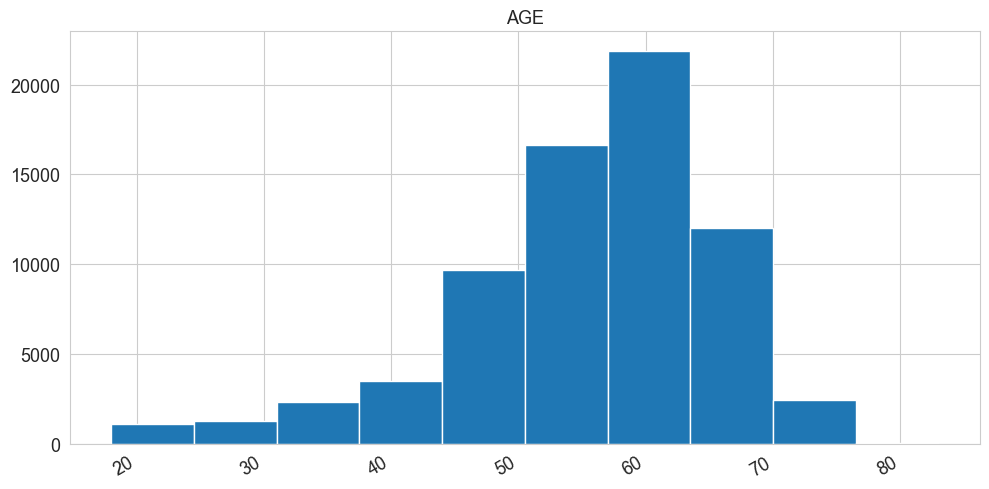

In [12]:
ds.var.numericas.histplot(['AGE'], figsize = (10,5))
plt.show();

A maior parte das pessoas que fazem transplante de fígado têm entre 50 e 70 anos.

---
Qual faixa de idade tende a ter a maior taxa de sucesso da cirurgia?

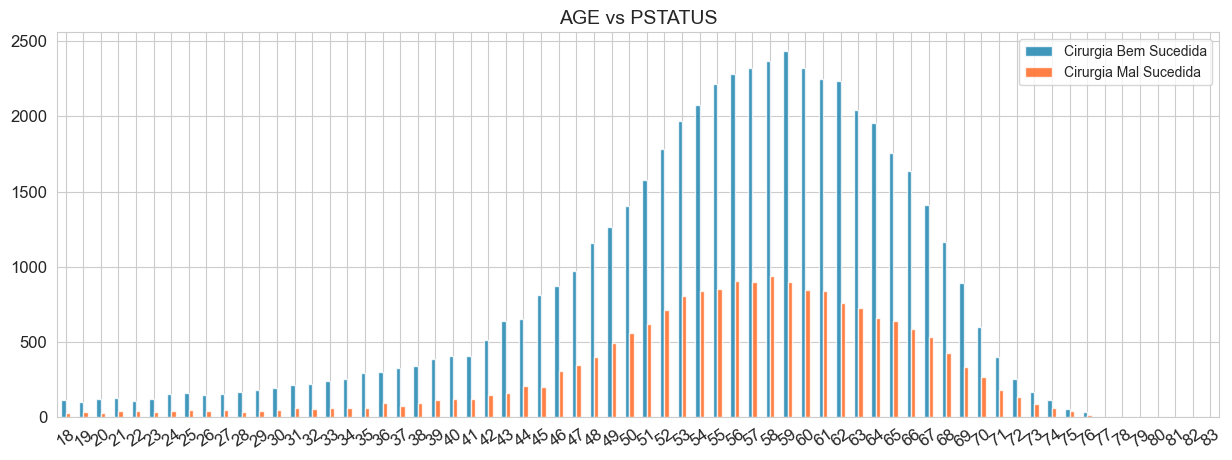

In [13]:
ds.var.categoricas.crosstab.plot(['AGE'], ['PSTATUS'], color=['#' + '107dac', '#' + 'FF5F15'], alpha = 0.8)
plt.legend(labels = ['Cirurgia Bem Sucedida', 'Cirurgia Mal Sucedida'])
plt.show();

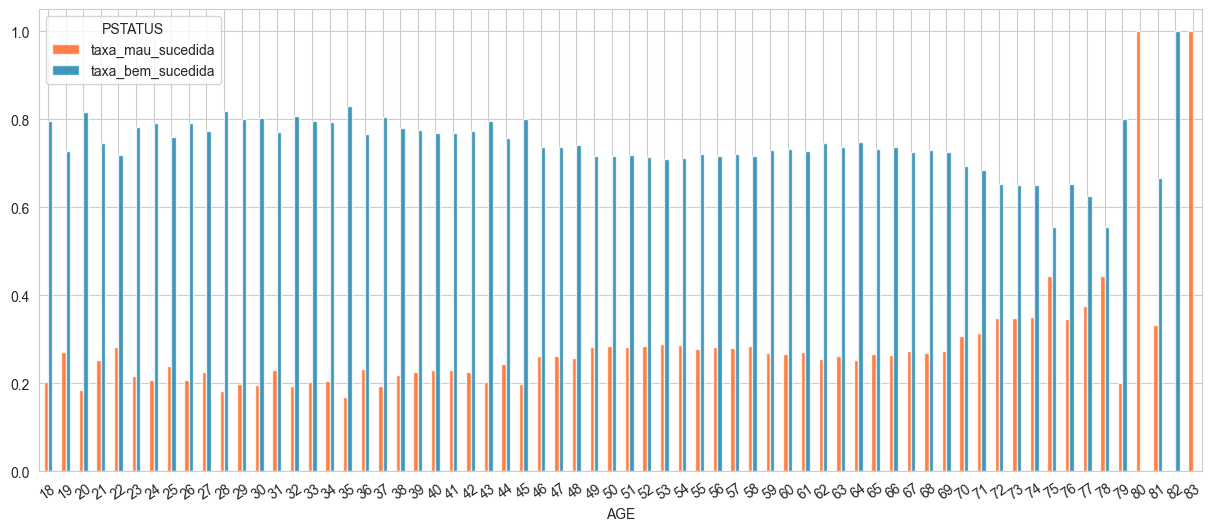

In [14]:
age_ps = ds.var.categoricas.crosstab.show(['AGE'], ['PSTATUS']).reset_index()
age_ps['taxa_0'] = age_ps[0] / np.sum(age_ps[0])
age_ps['taxa_1'] = age_ps[1] / np.sum(age_ps[1])
age_ps['taxa_total_0'] = age_ps[0] / (np.sum(age_ps[0]) + np.sum(age_ps[1]))
age_ps['taxa_total_1'] = age_ps[1] / (np.sum(age_ps[0]) + np.sum(age_ps[1]))
age_ps['taxa_mau_sucedida'] = age_ps[1] / (age_ps[0] + age_ps[1])
age_ps['taxa_bem_sucedida'] = age_ps[0] / (age_ps[0] + age_ps[1])

age_ps[['taxa_mau_sucedida', 'taxa_bem_sucedida', 'AGE']].set_index('AGE').plot(
    kind = 'bar', figsize = (15,6), color=['#' + 'FF5F15', '#' + '107dac'], alpha = 0.8)
plt.xticks(rotation = 35)
plt.show();

### Interpretando os dois gráficos acima:
- **Gráfico 1:** O gráfico primeiramente confirma que a maior parte dos pacientes estão na faixa de 50 a 70 anos, porém tambem mostra que, para este conjunto de dados, as pessoas tendem a ter uma cirurgia bem sucedida bem mais do que cirurgia mal sucedida.

- **Gráfico 2:** O gráfico mostra que, para este conjunto de dados, quanto maior a idade do paciente as chances de ter uma cirurgia bem sucedida são levemente menores.

---
Quantos anos as pessoas vivem em média após o transplante de fígado?

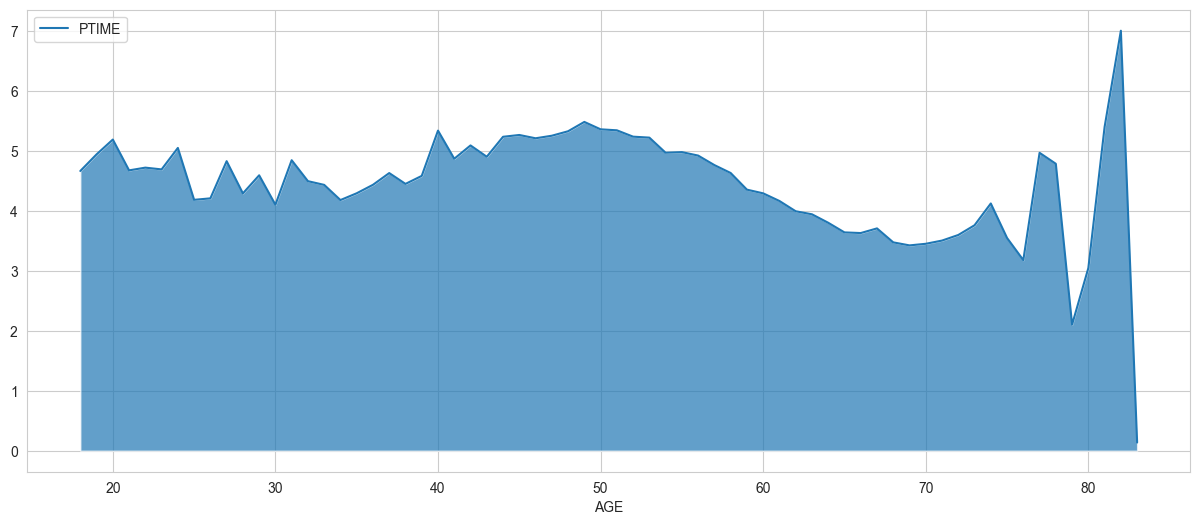

In [15]:
age_ptime = ds.groupby('AGE').agg({'PTIME':'mean'}) / 365
age_ptime.plot(linewidth = 1.5, figsize = (15,6))
plt.fill_between(x = age_ptime.index, y1 = age_ptime['PTIME'], alpha = 0.7)
plt.show();

O gráfico mostra que as pessoas vivem em média 5 anos após o transplante de fígado, sendo que este valor tende a cair aos 55 anos em diante.

In [16]:
ds.head()

,DAYSWAIT_CHRON,PSTATUS,FINAL_MELD_SCORE,PTIME,TX_DATE,PX_STAT,PX_STAT_DATE,AGE,ABO,GENDER,WGT_KG_TCR,HGT_CM_TCR,BMI_TCR,DIAB,INIT_AGE,ETHCAT,REGION,PERM_STATE,TX_Year,TX_PROCEDUR_TY,MED_COND_TRR,PREV_TX,AGE_DON,GENDER_DON,HGT_CM_DON_CALC,WGT_KG_DON_CALC,BMI_DON_CALC,COD_CAD_DON,ETHCAT_DON,HOME_STATE_DON,DIABETES_DON,HIST_HYPERTENS_DON,ABO_DON,HIST_CANCER_DON,ALCOHOL_HEAVY_DON,ABO_MAT,COLD_ISCH,MALIG,HGT_CM_CALC,WGT_KG_CALC,BMI_CALC,TX_MELD,LISTYR,LiverSize,LiverSizeDon
0,7,0,39,51.0,12/24/2018,A,2/13/2019,30,O,1,56.24,162.60,21.27,1.0,30,1,2,MD,2018,701,1.0,N,24,1,173.0,75.0,25.06,3.0,2.0,PA,N,N,O,N,N,1,4.30,U,162.6,45.0,17.0,No,2018,1721.500,2276.860
1,5,0,19,6.0,12/23/2018,A,12/29/2018,63,A,0,81.92,177.80,25.91,1.0,63,1,3,GA,2018,701,3.0,N,34,0,183.0,90.0,26.87,3.0,1.0,GA,N,N,A,N,N,1,3.48,U,177.8,85.0,26.9,No,2018,1934.720,2387.360
2,10,0,22,6.0,12/28/2018,A,1/3/2019,48,B,0,78.93,181.10,24.06,1.0,48,1,10,OH,2018,701,3.0,N,42,1,173.0,107.0,35.75,1.0,1.0,NY,Y,Y,B,N,N,1,4.95,U,182.9,76.2,22.8,No,2018,1987.348,2555.460
3,9,0,35,27.0,12/27/2018,A,1/23/2019,54,O,1,63.50,154.94,26.45,1.0,54,1,4,TX,2018,701,2.0,N,48,1,157.0,93.0,37.73,2.0,1.0,TX,N,Y,O,N,N,1,3.62,U,154.9,61.1,25.5,No,2018,1669.494,2255.140
4,2,0,35,54.0,12/20/2018,A,2/12/2019,71,O,1,75.75,162.56,28.67,1.0,71,1,3,LA,2018,701,3.0,N,37,1,173.0,81.6,27.26,3.0,1.0,AR,N,N,O,N,N,1,7.50,U,162.6,70.8,26.8,No,2018,1605.492,2214.884


---
Quantos anos os pacientes vivem em média após a cirurgia dependendo do tempo de espera até a realização da mesma?

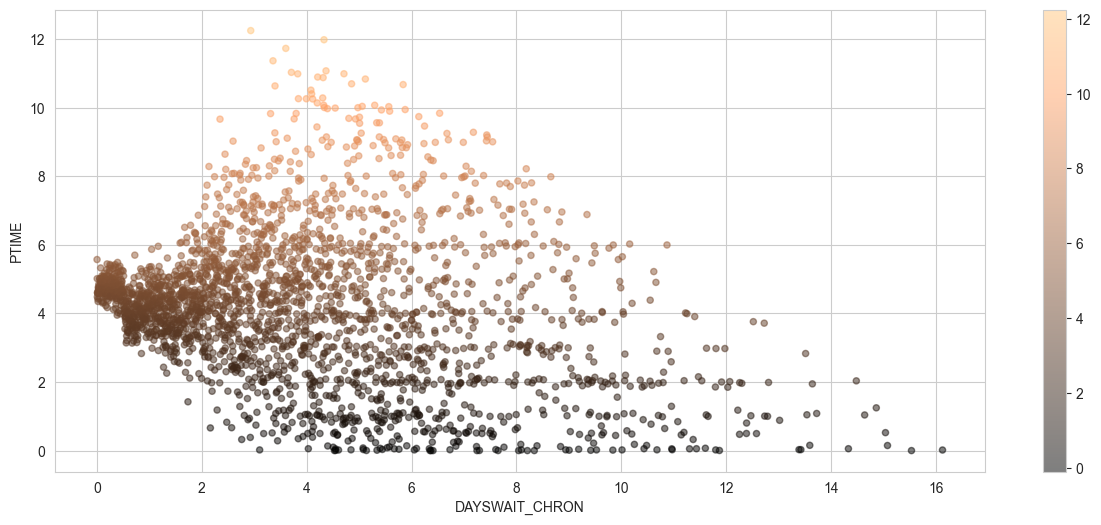

In [17]:
wait_ptime = ds.groupby('DAYSWAIT_CHRON').agg({'PTIME':'mean'}).reset_index() / 365
wait_ptime.plot(kind = 'scatter',x = 'DAYSWAIT_CHRON', y = 'PTIME', figsize = (15,6),
                marker = 'o', linewidth = 1, c = wait_ptime['PTIME'], cmap = 'copper',
                vmin = wait_ptime['PTIME'].max(), vmax = wait_ptime['PTIME'].min(), alpha = 0.5)
plt.show();

Existem pessoas que chegam a esperar até 16 anos para realizar a cirurgia (isso é bem estranho, pois é basicamente a vida de um jovem). O gráfico também mostra que quanto maior o tempo de espera até a cirurgia, menor é o tempo de vida após a mesma.

In [18]:
ds.head()

,DAYSWAIT_CHRON,PSTATUS,FINAL_MELD_SCORE,PTIME,TX_DATE,PX_STAT,PX_STAT_DATE,AGE,ABO,GENDER,WGT_KG_TCR,HGT_CM_TCR,BMI_TCR,DIAB,INIT_AGE,ETHCAT,REGION,PERM_STATE,TX_Year,TX_PROCEDUR_TY,MED_COND_TRR,PREV_TX,AGE_DON,GENDER_DON,HGT_CM_DON_CALC,WGT_KG_DON_CALC,BMI_DON_CALC,COD_CAD_DON,ETHCAT_DON,HOME_STATE_DON,DIABETES_DON,HIST_HYPERTENS_DON,ABO_DON,HIST_CANCER_DON,ALCOHOL_HEAVY_DON,ABO_MAT,COLD_ISCH,MALIG,HGT_CM_CALC,WGT_KG_CALC,BMI_CALC,TX_MELD,LISTYR,LiverSize,LiverSizeDon
0,7,0,39,51.0,12/24/2018,A,2/13/2019,30,O,1,56.24,162.60,21.27,1.0,30,1,2,MD,2018,701,1.0,N,24,1,173.0,75.0,25.06,3.0,2.0,PA,N,N,O,N,N,1,4.30,U,162.6,45.0,17.0,No,2018,1721.500,2276.860
1,5,0,19,6.0,12/23/2018,A,12/29/2018,63,A,0,81.92,177.80,25.91,1.0,63,1,3,GA,2018,701,3.0,N,34,0,183.0,90.0,26.87,3.0,1.0,GA,N,N,A,N,N,1,3.48,U,177.8,85.0,26.9,No,2018,1934.720,2387.360
2,10,0,22,6.0,12/28/2018,A,1/3/2019,48,B,0,78.93,181.10,24.06,1.0,48,1,10,OH,2018,701,3.0,N,42,1,173.0,107.0,35.75,1.0,1.0,NY,Y,Y,B,N,N,1,4.95,U,182.9,76.2,22.8,No,2018,1987.348,2555.460
3,9,0,35,27.0,12/27/2018,A,1/23/2019,54,O,1,63.50,154.94,26.45,1.0,54,1,4,TX,2018,701,2.0,N,48,1,157.0,93.0,37.73,2.0,1.0,TX,N,Y,O,N,N,1,3.62,U,154.9,61.1,25.5,No,2018,1669.494,2255.140
4,2,0,35,54.0,12/20/2018,A,2/12/2019,71,O,1,75.75,162.56,28.67,1.0,71,1,3,LA,2018,701,3.0,N,37,1,173.0,81.6,27.26,3.0,1.0,AR,N,N,O,N,N,1,7.50,U,162.6,70.8,26.8,No,2018,1605.492,2214.884


## Análise Exploratória - Severidade da Doença Hepática
---

Qual a Severidade Média da Doenca Hepática por idade

<Axes: xlabel='AGE'>

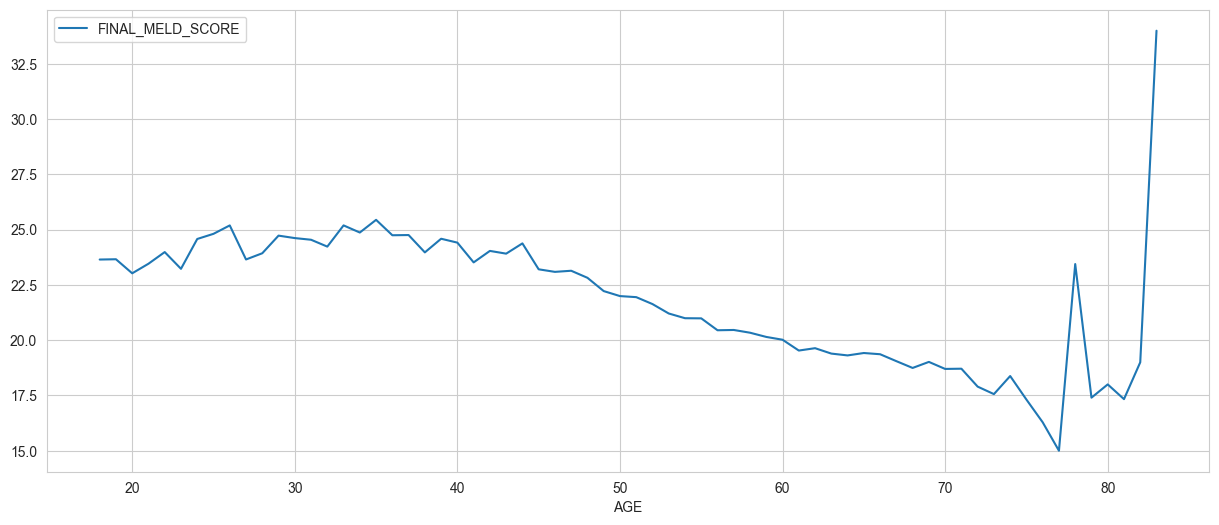

In [19]:
meld_age = ds.groupby('AGE').agg({'FINAL_MELD_SCORE':'mean'}).reset_index()
meld_age.plot.line('AGE', 'FINAL_MELD_SCORE', figsize = (15,6))

---
Aqui neste gráfico observa-se que em média o nível de severeidade da doença hepática é maior nas pessoas dos 20 aos 45 anos. Isso nos indica que a idade realmente tem muita relação com o sucesso da cirurgia.

Portanto podemos levantar a hipótese de que, quanto maior a idade, maiores são as chances de ter uma cirurgia mal sucedida, pois mesmo com a severidade da doença hepática menor do que os mais novos, ainda sim, a taxa de cirurgias mal sucedidas aumenta levemente, quase não tendo impacto. O que nos leva a acreditar que, caso a severidade da doença hepática fosse a mesma, as chances do não sucesso da cirurgia seria bem maior.

In [20]:
ds.head()

,DAYSWAIT_CHRON,PSTATUS,FINAL_MELD_SCORE,PTIME,TX_DATE,PX_STAT,PX_STAT_DATE,AGE,ABO,GENDER,WGT_KG_TCR,HGT_CM_TCR,BMI_TCR,DIAB,INIT_AGE,ETHCAT,REGION,PERM_STATE,TX_Year,TX_PROCEDUR_TY,MED_COND_TRR,PREV_TX,AGE_DON,GENDER_DON,HGT_CM_DON_CALC,WGT_KG_DON_CALC,BMI_DON_CALC,COD_CAD_DON,ETHCAT_DON,HOME_STATE_DON,DIABETES_DON,HIST_HYPERTENS_DON,ABO_DON,HIST_CANCER_DON,ALCOHOL_HEAVY_DON,ABO_MAT,COLD_ISCH,MALIG,HGT_CM_CALC,WGT_KG_CALC,BMI_CALC,TX_MELD,LISTYR,LiverSize,LiverSizeDon
0,7,0,39,51.0,12/24/2018,A,2/13/2019,30,O,1,56.24,162.60,21.27,1.0,30,1,2,MD,2018,701,1.0,N,24,1,173.0,75.0,25.06,3.0,2.0,PA,N,N,O,N,N,1,4.30,U,162.6,45.0,17.0,No,2018,1721.500,2276.860
1,5,0,19,6.0,12/23/2018,A,12/29/2018,63,A,0,81.92,177.80,25.91,1.0,63,1,3,GA,2018,701,3.0,N,34,0,183.0,90.0,26.87,3.0,1.0,GA,N,N,A,N,N,1,3.48,U,177.8,85.0,26.9,No,2018,1934.720,2387.360
2,10,0,22,6.0,12/28/2018,A,1/3/2019,48,B,0,78.93,181.10,24.06,1.0,48,1,10,OH,2018,701,3.0,N,42,1,173.0,107.0,35.75,1.0,1.0,NY,Y,Y,B,N,N,1,4.95,U,182.9,76.2,22.8,No,2018,1987.348,2555.460
3,9,0,35,27.0,12/27/2018,A,1/23/2019,54,O,1,63.50,154.94,26.45,1.0,54,1,4,TX,2018,701,2.0,N,48,1,157.0,93.0,37.73,2.0,1.0,TX,N,Y,O,N,N,1,3.62,U,154.9,61.1,25.5,No,2018,1669.494,2255.140
4,2,0,35,54.0,12/20/2018,A,2/12/2019,71,O,1,75.75,162.56,28.67,1.0,71,1,3,LA,2018,701,3.0,N,37,1,173.0,81.6,27.26,3.0,1.0,AR,N,N,O,N,N,1,7.50,U,162.6,70.8,26.8,No,2018,1605.492,2214.884


## Análise Exploratória - Pacientes com Diabetes
---

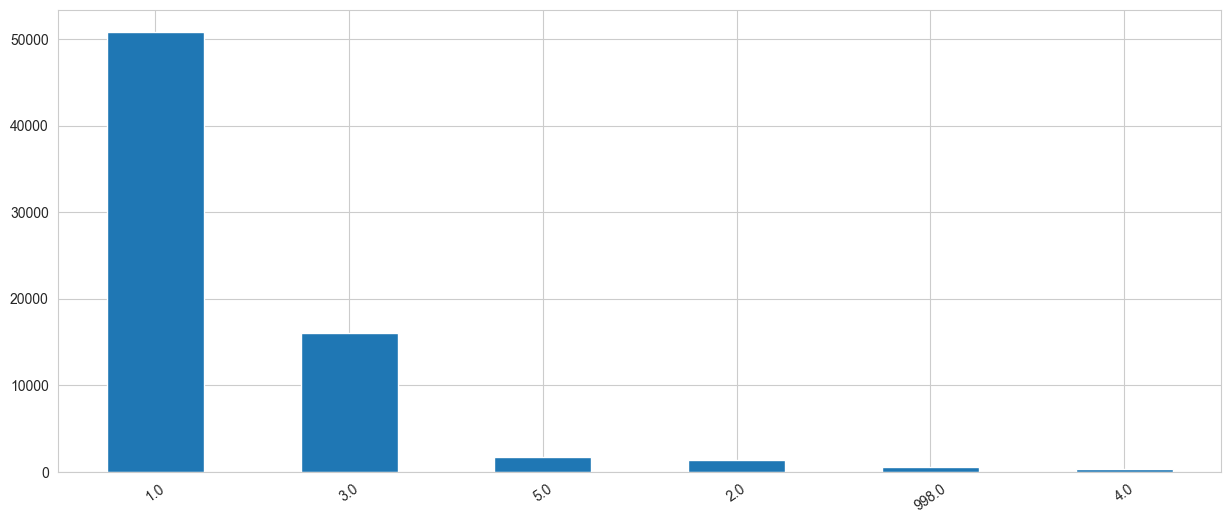

In [21]:
ds['DIAB'].value_counts().plot.bar(figsize = (15,6))
plt.xticks(rotation = 35)
plt.show();

O gráfico mostra quantas pessoas possuem cada nível de diabetes. Também vemos que tem um valor estranho ali, seria o diabetes tipo 998, pode ter sido um erro e digitação, eu prefiro manter este valor, pois posteriormente a pessoa que participou da criação deste conjunto de dados poderá explicar o significado real deste número e assim não perderemos esses registros.

Caso a pessoa não descubra o que este valor significa, basta eu voltar aqui, excluir os registros e então entregar a análise novamente, porém customizada sem a presenca do diabetes tipo 998

---
Qual a taxa de pessoas que tem ou não uma cirurgia bem sucedida, mediante o nível de diabetes?

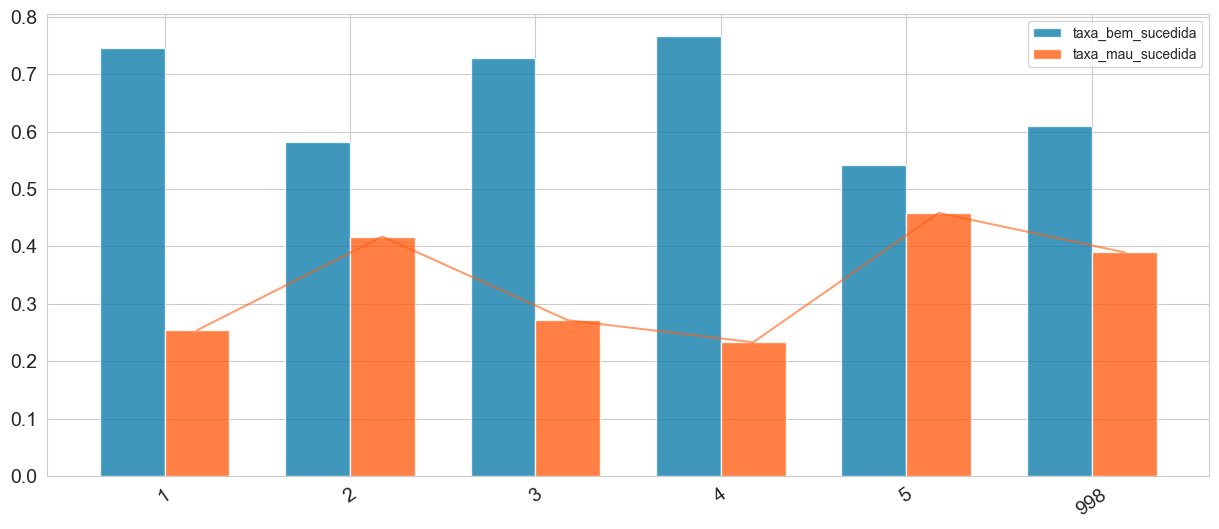

In [22]:
diab_ps = ds.crosstab.show(['DIAB'], ['PSTATUS']).reset_index()
diab_ps['taxa_bem_sucedida'] = diab_ps[0] / (diab_ps[0] + diab_ps[1])
diab_ps['taxa_mau_sucedida'] = diab_ps[1] / (diab_ps[0] + diab_ps[1])

# diab_ps.plot.bar('DIAB', ['taxa_morte', 'taxa_sobrevivencia'], figsize = (15,6),
                #  color = ['#' + 'FF5F15', '#' + '107dac'], alpha = 0.7)
fig, ax = plt.subplots(figsize = (15,6))
xlabels = diab_ps['DIAB'].map(lambda x: 6 if x == 998 else x)
xlabels_values = ['', '1', '2', '3', '4', '5', '998']

width = 0.35
ax.bar(xlabels - width / 2, height = diab_ps['taxa_bem_sucedida'], width = width, color = '#' + '107dac', alpha = 0.8,
label = 'taxa_bem_sucedida')
ax.bar(xlabels + width / 2, height = diab_ps['taxa_mau_sucedida'], width = width, color = '#' + 'FF5F15', alpha = 0.8,
label = 'taxa_mau_sucedida')
ax.plot(xlabels + width / 2, diab_ps['taxa_mau_sucedida'], color = '#' + 'FF5F15', alpha = 0.6)
ax.set_xticklabels(xlabels_values)

plt.xticks(rotation = 35, fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend()
plt.show();

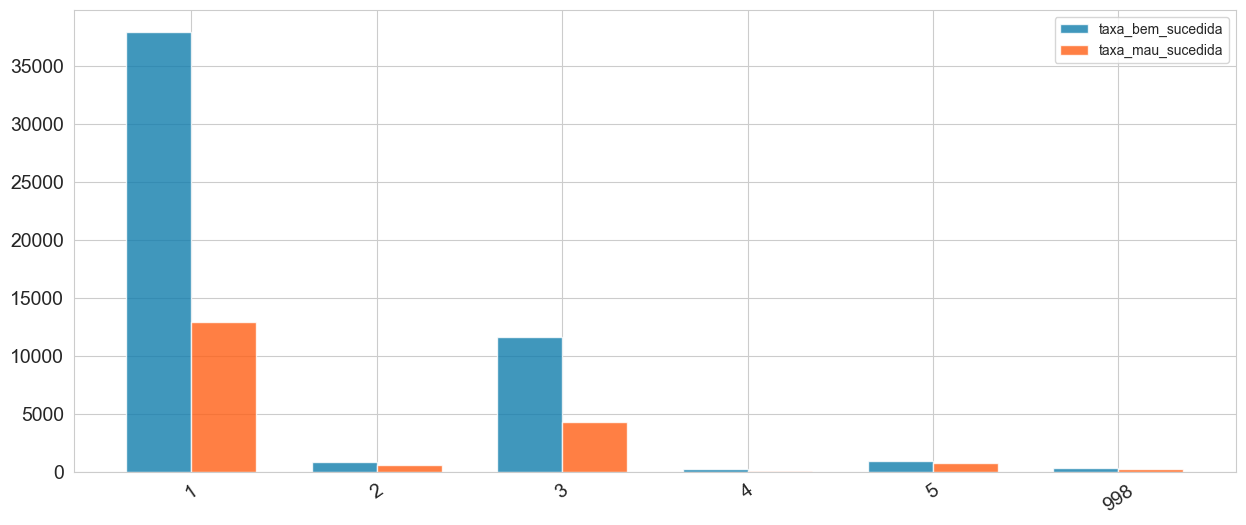

In [23]:
fig, ax = plt.subplots(figsize = (15,6))
xlabels = diab_ps['DIAB'].map(lambda x: 6 if x == 998 else x)
xlabels_values = ['', '1', '2', '3', '4', '5', '998']

width = 0.35
ax.bar(xlabels - width / 2, height = diab_ps[0], width = width, color = '#' + '107dac', alpha = 0.8,
label = 'taxa_bem_sucedida')
ax.bar(xlabels + width / 2, height = diab_ps[1], width = width, color = '#' + 'FF5F15', alpha = 0.8,
label = 'taxa_mau_sucedida')
# ax.plot(xlabels + width / 2, diab_ps[1], color = '#' + '107dac', alpha = 0.6)
ax.set_xticklabels(xlabels_values)

plt.xticks(rotation = 35, fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend()
plt.show();

### Interpretando os Gráficos Acima
- **Gráfico 1:** Os diabetes tipo 2, 5 e 998 são as que têm maior taxa de processo cirurgico mau sucedido.

- **Gráfico 2:** O diabetes tipo 1 é o que mais está presente quando há doença hepática.

In [24]:
ds.head()

,DAYSWAIT_CHRON,PSTATUS,FINAL_MELD_SCORE,PTIME,TX_DATE,PX_STAT,PX_STAT_DATE,AGE,ABO,GENDER,WGT_KG_TCR,HGT_CM_TCR,BMI_TCR,DIAB,INIT_AGE,ETHCAT,REGION,PERM_STATE,TX_Year,TX_PROCEDUR_TY,MED_COND_TRR,PREV_TX,AGE_DON,GENDER_DON,HGT_CM_DON_CALC,WGT_KG_DON_CALC,BMI_DON_CALC,COD_CAD_DON,ETHCAT_DON,HOME_STATE_DON,DIABETES_DON,HIST_HYPERTENS_DON,ABO_DON,HIST_CANCER_DON,ALCOHOL_HEAVY_DON,ABO_MAT,COLD_ISCH,MALIG,HGT_CM_CALC,WGT_KG_CALC,BMI_CALC,TX_MELD,LISTYR,LiverSize,LiverSizeDon
0,7,0,39,51.0,12/24/2018,A,2/13/2019,30,O,1,56.24,162.60,21.27,1.0,30,1,2,MD,2018,701,1.0,N,24,1,173.0,75.0,25.06,3.0,2.0,PA,N,N,O,N,N,1,4.30,U,162.6,45.0,17.0,No,2018,1721.500,2276.860
1,5,0,19,6.0,12/23/2018,A,12/29/2018,63,A,0,81.92,177.80,25.91,1.0,63,1,3,GA,2018,701,3.0,N,34,0,183.0,90.0,26.87,3.0,1.0,GA,N,N,A,N,N,1,3.48,U,177.8,85.0,26.9,No,2018,1934.720,2387.360
2,10,0,22,6.0,12/28/2018,A,1/3/2019,48,B,0,78.93,181.10,24.06,1.0,48,1,10,OH,2018,701,3.0,N,42,1,173.0,107.0,35.75,1.0,1.0,NY,Y,Y,B,N,N,1,4.95,U,182.9,76.2,22.8,No,2018,1987.348,2555.460
3,9,0,35,27.0,12/27/2018,A,1/23/2019,54,O,1,63.50,154.94,26.45,1.0,54,1,4,TX,2018,701,2.0,N,48,1,157.0,93.0,37.73,2.0,1.0,TX,N,Y,O,N,N,1,3.62,U,154.9,61.1,25.5,No,2018,1669.494,2255.140
4,2,0,35,54.0,12/20/2018,A,2/12/2019,71,O,1,75.75,162.56,28.67,1.0,71,1,3,LA,2018,701,3.0,N,37,1,173.0,81.6,27.26,3.0,1.0,AR,N,N,O,N,N,1,7.50,U,162.6,70.8,26.8,No,2018,1605.492,2214.884


---
Quantos anos em média as pessoas sobrevivem depois da cirurgia para cada tipo de diabetes?

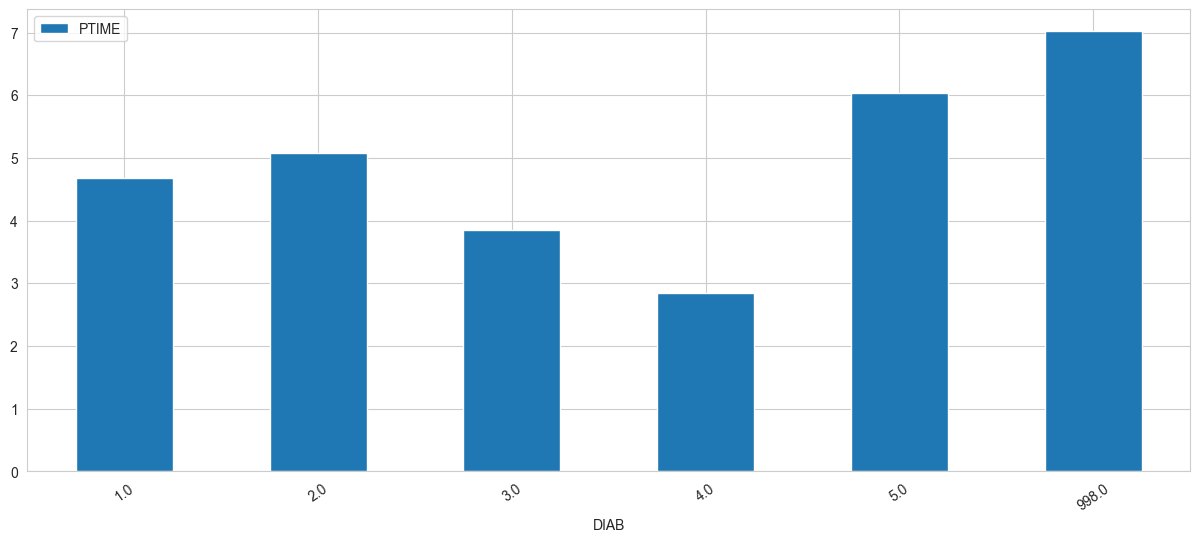

In [25]:
diab_ptime = ds.groupby('DIAB').agg({'PTIME':'mean'}) / 365
diab_ptime.reset_index(inplace = True)
# xlabels = diab_ps['DIAB'].map(lambda x: 6 if x == 998 else x)
# xlabels_values = ['', '1', '2', '3', '4', '5', '998']
diab_ptime.plot.bar('DIAB', 'PTIME', figsize = (15,6))
plt.xticks(rotation = 35)
plt.show();

As pessoas que possuem diabetes tipo 5 e tipo 998 são as que sobrevivem por mais anos após a cirurgia. Porém as pessoas que possuem o diabetes tipo 1 (que é o mais comum em pessoas com doença hapática) sobrevivem 4 anos e meio em média após o processo cirúrgico.

## Análise Exploratória - Tipo Sanguíneo
---

O tipo sanguíneo do doador sempre é idêntico ao do paciente? Se não, qual a taxa de sucesso cirúrgico para esses casos em comparação com a taxa de sucesso cirúrgico para os casos onde o tipo sanguíneo é idêntico?

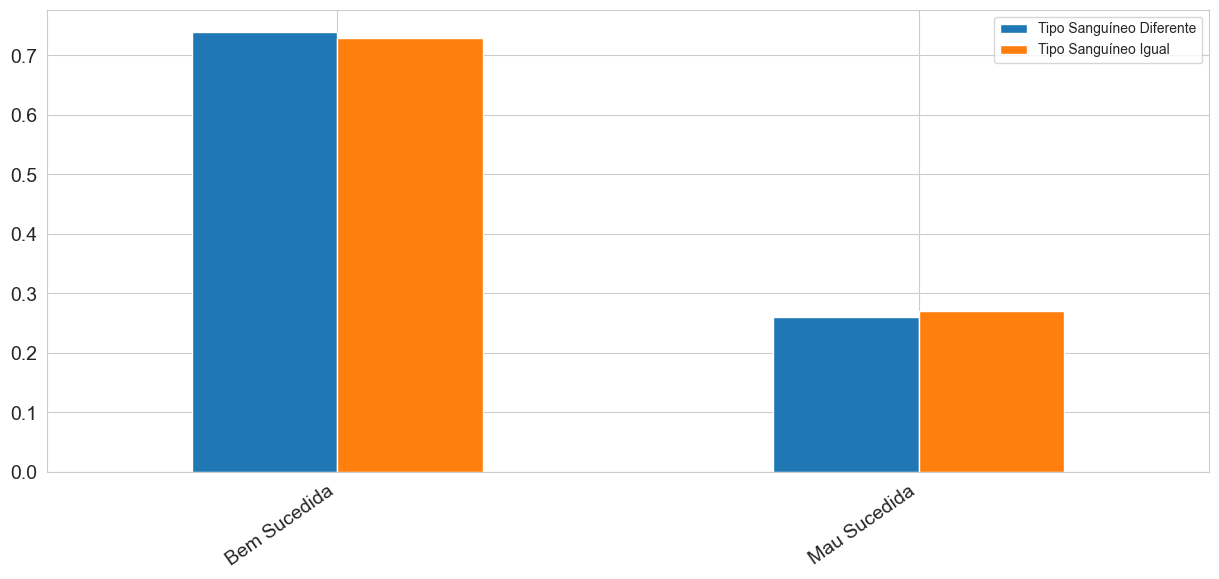

In [26]:
abo_abo_don_diff = ds[ds['ABO'] != ds['ABO_DON']]
abo_abo_don_eq = ds[ds['ABO'] == ds['ABO_DON']]
abo_ps = (abo_abo_don_diff['PSTATUS'].value_counts() / abo_abo_don_diff.shape[0]).reset_index().drop(columns = ['index'])
abo_ps['PSTATUS_EQ'] = (abo_abo_don_eq['PSTATUS'].value_counts() / abo_abo_don_eq.shape[0]).reset_index().drop(columns = ['index'])
abo_ps.plot.bar(figsize = (15,6))
plt.xticks(ticks = [0,1], labels = ['Bem Sucedida', 'Mau Sucedida'],
            rotation = 35, ha = 'right', fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(labels = ['Tipo Sanguíneo Diferente', 'Tipo Sanguíneo Igual'])
plt.show();


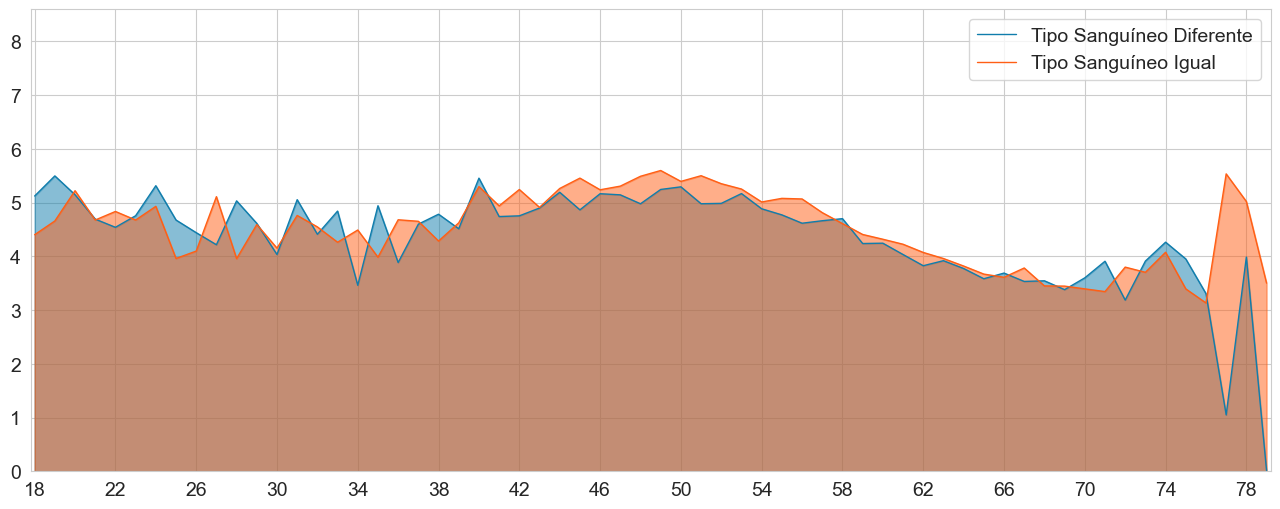

In [27]:
abo_ptime = abo_abo_don_diff.groupby('AGE').agg({'PTIME':'mean'}).reset_index()
abo_diff = abo_abo_don_eq.groupby('AGE').agg({'PTIME':'mean'}).reset_index().rename(columns = {'PTIME':'PTIME_EQ'})
abo_ptime.merge(abo_diff, how = 'left', on = 'AGE')
abo_ptime = pd.merge(abo_ptime, abo_diff, on = 'AGE')
abo_ptime['PTIME'] = abo_ptime['PTIME'] / 365
abo_ptime['PTIME_EQ'] = abo_ptime['PTIME_EQ'] / 365
# abo_ptime.plot.bar('AGE', ['PTIME', 'PTIME_EQ'], figsize = (16,6))
plt.figure(figsize = (16,6))
plt.plot(abo_ptime['AGE'], abo_ptime['PTIME'], color = '#' + '107dac', label = 'Tipo Sanguíneo Diferente',
linewidth = 1)
plt.plot(abo_ptime['AGE'], abo_ptime['PTIME_EQ'], color = '#' + 'FF5F15', label = 'Tipo Sanguíneo Igual',
linewidth = 1)
plt.fill_between(abo_ptime['AGE'], abo_ptime['PTIME'], alpha = 0.5, color = '#' + '107dac')
plt.fill_between(abo_ptime['AGE'], abo_ptime['PTIME_EQ'], alpha = 0.5, color = '#' + 'FF5F15')
plt.ylim(0, abo_ptime['PTIME_EQ'].max() + 3)
plt.xlim(abo_ptime['AGE'].min() - 0.2, abo_ptime['AGE'].max() + 0.2)
plt.xticks(ticks = range(abo_ptime['AGE'].min(), abo_ptime['AGE'].max(), 4), fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 14)
plt.show();

### Interpretando os Gráficos Acima
- **Gráfico 1:** O tipo sangíneo do doador ser igual ou diferente do paciente não tem relação com o sucesso do processo cirúrgico.

- **Gráfico 2:** O tipo sangíneo do doador ser igual ou diferente do paciente não tem relação com sobrevivência após o processo cirúrgico.

---
Qual a distribuição de idade dos doadores de fígado?

A parentemente não há idade específica para as pessoas que decidem doar o fígado. A distribuição se extende desde os 20 aos 65 anos (em sua grande maioria)

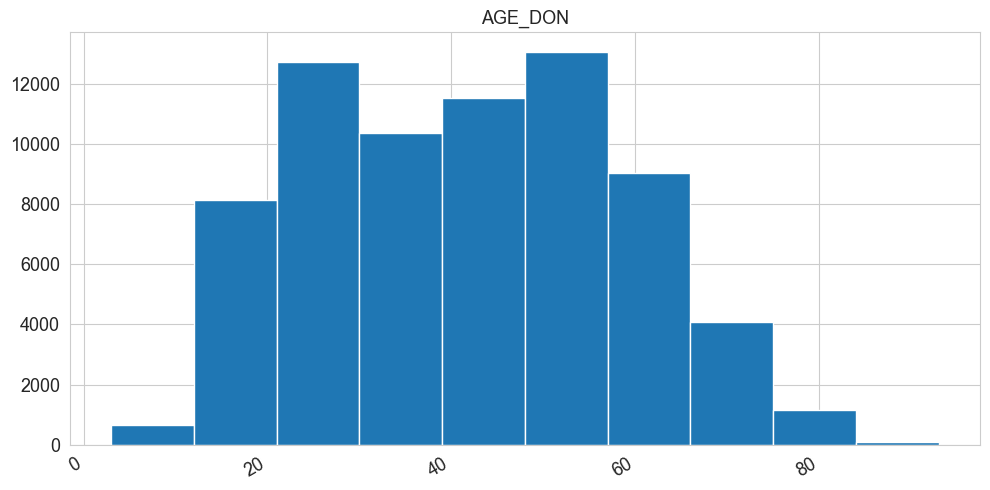

In [28]:
ds.var.numericas.histplot(['AGE_DON'], figsize = (10,5))

## Análise Exploratória - Correlação
---
O propósito de calcular a correlação é verificar se existe colinearidade entre as variáveis (desde que não seja aquela que queremos prever). Caso duas variáveis tenham alta correlação entre si, elas estão transmitindo a mesma informação, portanto uma delas deverá ser retirada do processo de treinamento do modelo, caso contrário haverá enviezamento nas decisões do modelo.

In [29]:
ds.show

,DAYSWAIT_CHRON,PSTATUS,FINAL_MELD_SCORE,PTIME,TX_DATE,PX_STAT,PX_STAT_DATE,AGE,ABO,GENDER,WGT_KG_TCR,HGT_CM_TCR,BMI_TCR,DIAB,INIT_AGE,ETHCAT,REGION,PERM_STATE,TX_Year,TX_PROCEDUR_TY,MED_COND_TRR,PREV_TX,AGE_DON,GENDER_DON,HGT_CM_DON_CALC,WGT_KG_DON_CALC,BMI_DON_CALC,COD_CAD_DON,ETHCAT_DON,HOME_STATE_DON,DIABETES_DON,HIST_HYPERTENS_DON,ABO_DON,HIST_CANCER_DON,ALCOHOL_HEAVY_DON,ABO_MAT,COLD_ISCH,MALIG,HGT_CM_CALC,WGT_KG_CALC,BMI_CALC,TX_MELD,LISTYR,LiverSize,LiverSizeDon
0,7,0,39,51.0,12/24/2018,A,2/13/2019,30,O,1,56.24,162.60,21.27,1.0,30,1,2,MD,2018,701,1.0,N,24,1,173.0,75.0,25.06,3.0,2.0,PA,N,N,O,N,N,1,4.30,U,162.6,45.0,17.0,No,2018,1721.500,2276.860
1,5,0,19,6.0,12/23/2018,A,12/29/2018,63,A,0,81.92,177.80,25.91,1.0,63,1,3,GA,2018,701,3.0,N,34,0,183.0,90.0,26.87,3.0,1.0,GA,N,N,A,N,N,1,3.48,U,177.8,85.0,26.9,No,2018,1934.720,2387.360
2,10,0,22,6.0,12/28/2018,A,1/3/2019,48,B,0,78.93,181.10,24.06,1.0,48,1,10,OH,2018,701,3.0,N,42,1,173.0,107.0,35.75,1.0,1.0,NY,Y,Y,B,N,N,1,4.95,U,182.9,76.2,22.8,No,2018,1987.348,2555.460
3,9,0,35,27.0,12/27/2018,A,1/23/2019,54,O,1,63.50,154.94,26.45,1.0,54,1,4,TX,2018,701,2.0,N,48,1,157.0,93.0,37.73,2.0,1.0,TX,N,Y,O,N,N,1,3.62,U,154.9,61.1,25.5,No,2018,1669.494,2255.140
4,2,0,35,54.0,12/20/2018,A,2/12/2019,71,O,1,75.75,162.56,28.67,1.0,71,1,3,LA,2018,701,3.0,N,37,1,173.0,81.6,27.26,3.0,1.0,AR,N,N,O,N,N,1,7.50,U,162.6,70.8,26.8,No,2018,1605.492,2214.884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70808,6,0,21,54.0,12/20/2018,A,2/12/2019,57,A1,1,98.43,162.56,37.25,3.0,57,1,3,FL,2018,701,1.0,N,18,0,188.0,108.0,30.56,3.0,1.0,FL,N,N,A,N,N,1,6.37,Y,162.6,87.2,33.0,No,2018,2046.948,2880.040
70809,6,0,28,26.0,12/20/2018,A,1/15/2019,51,A,1,67.13,152.40,28.90,3.0,51,4,7,IL,2018,701,2.0,N,40,1,160.0,84.2,32.89,2.0,2.0,IL,N,Y,A,N,N,1,4.63,U,152.4,66.2,28.5,No,2018,1789.368,2217.748
70810,12,0,35,30.0,12/26/2018,A,1/25/2019,60,O,0,101.11,182.88,30.23,3.0,60,1,2,NH,2018,701,1.0,N,28,1,167.6,79.8,28.40,3.0,2.0,PA,N,N,O,N,N,1,9.80,U,182.9,115.7,34.6,No,2018,2462.658,2301.932
70811,5,0,39,20.0,12/19/2018,A,1/8/2019,55,A,1,108.91,172.72,36.51,1.0,55,1,3,GA,2018,701,1.0,N,21,0,191.0,114.8,31.47,3.0,1.0,AR,N,N,A1,N,N,1,1.02,U,172.0,107.7,36.4,No,2018,2399.438,2949.852


In [30]:
numeric_variavles = ['DAYSWAIT_CHRON', 'FINAL_MELD_SCORE', 'PTIME', 'WGT_KG_TCR',
                     'HGT_CM_TCR', 'BMI_TCR', 'INIT_AGE', 'AGE_DON', 'HGT_CM_DON_CALC',
                     'WGT_KG_DON_CALC', 'BMI_DON_CALC', 'COLD_ISCH', 'HGT_CM_CALC', 'WGT_KG_CALC',
                     'BMI_CALC', 'LiverSize', 'LiverSizeDon']

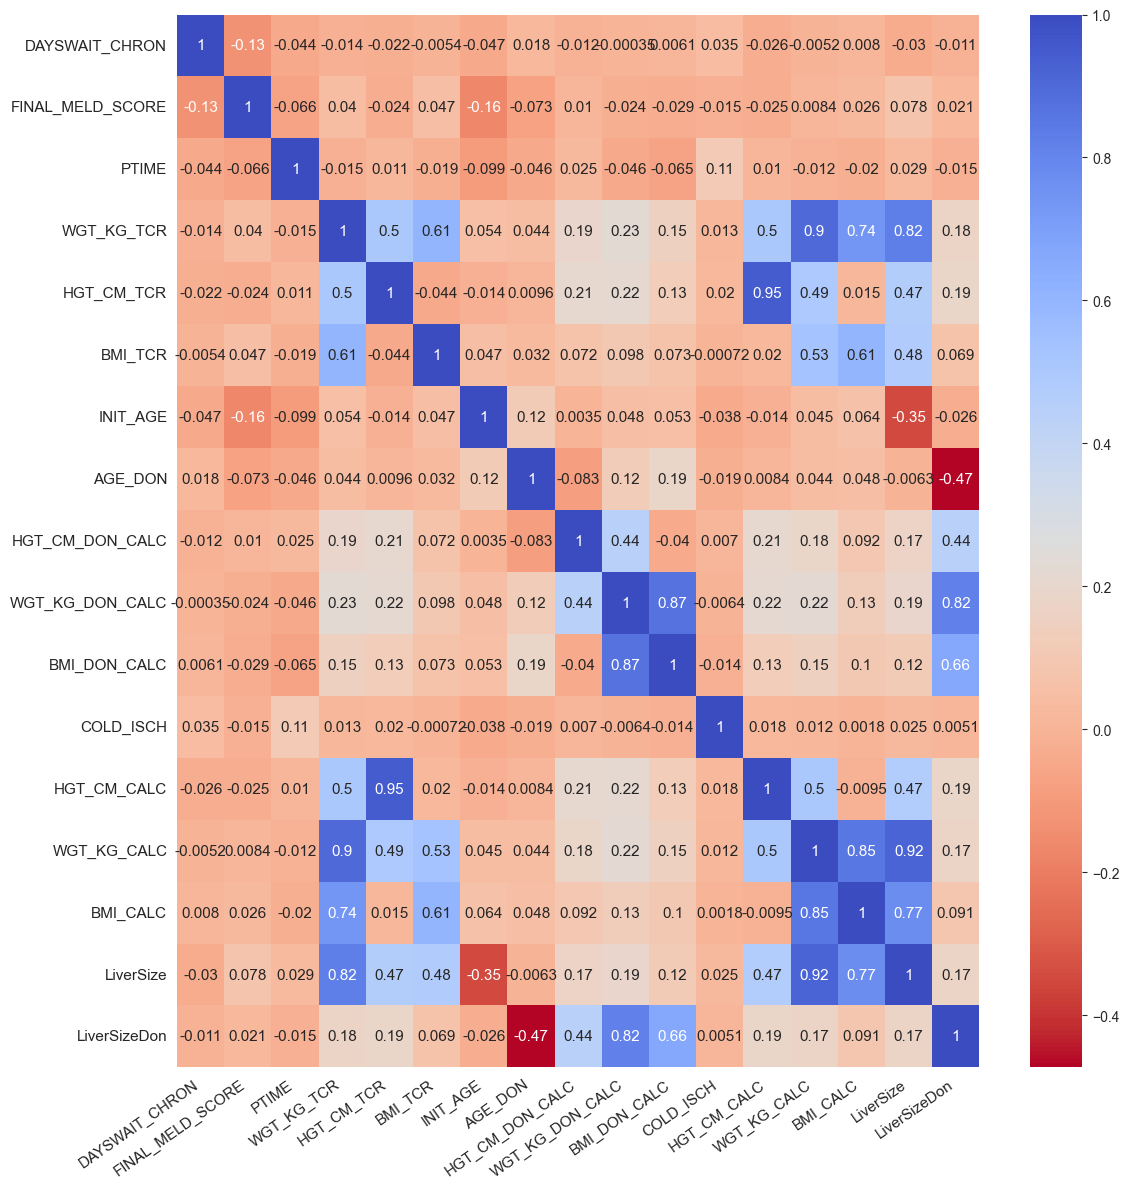

In [31]:
ds.var.numericas.corr.plot(columns = numeric_variavles, fontsize = 11)

In [32]:
ds.columns

Index(['DAYSWAIT_CHRON', 'PSTATUS', 'FINAL_MELD_SCORE', 'PTIME', 'TX_DATE',
       'PX_STAT', 'PX_STAT_DATE', 'AGE', 'ABO', 'GENDER', 'WGT_KG_TCR',
       'HGT_CM_TCR', 'BMI_TCR', 'DIAB', 'INIT_AGE', 'ETHCAT', 'REGION',
       'PERM_STATE', 'TX_Year', 'TX_PROCEDUR_TY', 'MED_COND_TRR', 'PREV_TX',
       'AGE_DON', 'GENDER_DON', 'HGT_CM_DON_CALC', 'WGT_KG_DON_CALC',
       'BMI_DON_CALC', 'COD_CAD_DON', 'ETHCAT_DON', 'HOME_STATE_DON',
       'DIABETES_DON', 'HIST_HYPERTENS_DON', 'ABO_DON', 'HIST_CANCER_DON',
       'ALCOHOL_HEAVY_DON', 'ABO_MAT', 'COLD_ISCH', 'MALIG', 'HGT_CM_CALC',
       'WGT_KG_CALC', 'BMI_CALC', 'TX_MELD', 'LISTYR', 'LiverSize',
       'LiverSizeDon'],
      dtype='object')

In [33]:
retirar_variavesi = ['LiverSizeDon', 'LiverSize', 'HGT_CM_TCR', 'BMI_TCR', 'HGT_CM_CALC']

## Pré-Processamento - Label Encoding
---

In [34]:
ds.show

,DAYSWAIT_CHRON,PSTATUS,FINAL_MELD_SCORE,PTIME,TX_DATE,PX_STAT,PX_STAT_DATE,AGE,ABO,GENDER,WGT_KG_TCR,HGT_CM_TCR,BMI_TCR,DIAB,INIT_AGE,ETHCAT,REGION,PERM_STATE,TX_Year,TX_PROCEDUR_TY,MED_COND_TRR,PREV_TX,AGE_DON,GENDER_DON,HGT_CM_DON_CALC,WGT_KG_DON_CALC,BMI_DON_CALC,COD_CAD_DON,ETHCAT_DON,HOME_STATE_DON,DIABETES_DON,HIST_HYPERTENS_DON,ABO_DON,HIST_CANCER_DON,ALCOHOL_HEAVY_DON,ABO_MAT,COLD_ISCH,MALIG,HGT_CM_CALC,WGT_KG_CALC,BMI_CALC,TX_MELD,LISTYR,LiverSize,LiverSizeDon
0,7,0,39,51.0,12/24/2018,A,2/13/2019,30,O,1,56.24,162.60,21.27,1.0,30,1,2,MD,2018,701,1.0,N,24,1,173.0,75.0,25.06,3.0,2.0,PA,N,N,O,N,N,1,4.30,U,162.6,45.0,17.0,No,2018,1721.500,2276.860
1,5,0,19,6.0,12/23/2018,A,12/29/2018,63,A,0,81.92,177.80,25.91,1.0,63,1,3,GA,2018,701,3.0,N,34,0,183.0,90.0,26.87,3.0,1.0,GA,N,N,A,N,N,1,3.48,U,177.8,85.0,26.9,No,2018,1934.720,2387.360
2,10,0,22,6.0,12/28/2018,A,1/3/2019,48,B,0,78.93,181.10,24.06,1.0,48,1,10,OH,2018,701,3.0,N,42,1,173.0,107.0,35.75,1.0,1.0,NY,Y,Y,B,N,N,1,4.95,U,182.9,76.2,22.8,No,2018,1987.348,2555.460
3,9,0,35,27.0,12/27/2018,A,1/23/2019,54,O,1,63.50,154.94,26.45,1.0,54,1,4,TX,2018,701,2.0,N,48,1,157.0,93.0,37.73,2.0,1.0,TX,N,Y,O,N,N,1,3.62,U,154.9,61.1,25.5,No,2018,1669.494,2255.140
4,2,0,35,54.0,12/20/2018,A,2/12/2019,71,O,1,75.75,162.56,28.67,1.0,71,1,3,LA,2018,701,3.0,N,37,1,173.0,81.6,27.26,3.0,1.0,AR,N,N,O,N,N,1,7.50,U,162.6,70.8,26.8,No,2018,1605.492,2214.884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70808,6,0,21,54.0,12/20/2018,A,2/12/2019,57,A1,1,98.43,162.56,37.25,3.0,57,1,3,FL,2018,701,1.0,N,18,0,188.0,108.0,30.56,3.0,1.0,FL,N,N,A,N,N,1,6.37,Y,162.6,87.2,33.0,No,2018,2046.948,2880.040
70809,6,0,28,26.0,12/20/2018,A,1/15/2019,51,A,1,67.13,152.40,28.90,3.0,51,4,7,IL,2018,701,2.0,N,40,1,160.0,84.2,32.89,2.0,2.0,IL,N,Y,A,N,N,1,4.63,U,152.4,66.2,28.5,No,2018,1789.368,2217.748
70810,12,0,35,30.0,12/26/2018,A,1/25/2019,60,O,0,101.11,182.88,30.23,3.0,60,1,2,NH,2018,701,1.0,N,28,1,167.6,79.8,28.40,3.0,2.0,PA,N,N,O,N,N,1,9.80,U,182.9,115.7,34.6,No,2018,2462.658,2301.932
70811,5,0,39,20.0,12/19/2018,A,1/8/2019,55,A,1,108.91,172.72,36.51,1.0,55,1,3,GA,2018,701,1.0,N,21,0,191.0,114.8,31.47,3.0,1.0,AR,N,N,A1,N,N,1,1.02,U,172.0,107.7,36.4,No,2018,2399.438,2949.852


In [35]:
ds_copy = deepcopy(ds)
ds_copy

Dataset(shape = (70813, 45))

In [36]:
to_encode = ['TX_DATE', 'PX_STAT', 'PX_STAT_DATE', 'ABO', 'PERM_STATE',
             'PREV_TX', 'HOME_STATE_DON', 'DIABETES_DON', 'HIST_HYPERTENS_DON',
             'ABO_DON', 'HIST_CANCER_DON', 'ALCOHOL_HEAVY_DON', 'MALIG', 'TX_MELD']

In [37]:
ds_copy.var.categoricas.encode.label_encoding(to_encode, inplace = True)

Dataset(shape = (70813, 45))

In [38]:
ds_copy.train_test_split('PTIME')
ds_copy.train

,DAYSWAIT_CHRON,PSTATUS,FINAL_MELD_SCORE,TX_DATE,PX_STAT,PX_STAT_DATE,AGE,ABO,GENDER,WGT_KG_TCR,HGT_CM_TCR,BMI_TCR,DIAB,INIT_AGE,ETHCAT,REGION,PERM_STATE,TX_Year,TX_PROCEDUR_TY,MED_COND_TRR,PREV_TX,AGE_DON,GENDER_DON,HGT_CM_DON_CALC,WGT_KG_DON_CALC,BMI_DON_CALC,COD_CAD_DON,ETHCAT_DON,HOME_STATE_DON,DIABETES_DON,HIST_HYPERTENS_DON,ABO_DON,HIST_CANCER_DON,ALCOHOL_HEAVY_DON,ABO_MAT,COLD_ISCH,MALIG,HGT_CM_CALC,WGT_KG_CALC,BMI_CALC,TX_MELD,LISTYR,LiverSize,LiverSizeDon,PTIME
47348,27,0,33,4426,0,4302,56,7,0,98.43,175.26,32.05,1.0,56,1,4,45,2014,701,3.0,0,69,0,165.1,83.2,30.52,2.0,4.0,45,0,2,7,0,0,1,5.00,1,175.3,93.6,30.5,0,2014,2161.824,1828.868,1503.0
33402,167,0,11,112,0,113,51,0,0,79.38,180.34,24.41,3.0,51,1,10,36,2012,701,3.0,0,27,0,180.3,107.0,32.90,3.0,1.0,37,0,0,1,0,0,1,6.15,1,181.6,88.5,26.8,0,2011,2144.830,2748.360,2557.0
32768,310,0,9,2881,0,2689,54,0,0,97.52,178.00,30.78,1.0,53,4,5,33,2012,701,3.0,0,21,0,191.0,153.0,41.94,3.0,1.0,4,0,2,1,0,0,1,1.40,2,177.8,100.7,31.9,0,2011,2300.718,3558.760,2189.0
25601,12,1,16,1602,1,4723,42,7,1,75.00,152.40,32.29,1.0,42,4,10,23,2009,701,1.0,1,34,0,177.8,140.0,44.29,1.0,1.0,37,0,2,7,0,0,1,5.05,0,152.4,68.0,29.3,0,2009,1933.800,3184.360,2091.0
30962,253,0,18,526,0,1916,56,0,1,62.60,157.48,25.24,1.0,56,1,3,10,2011,701,3.0,0,53,1,165.1,83.5,30.63,3.0,1.0,10,0,0,1,0,0,1,5.78,0,157.5,61.6,24.8,0,2011,1651.744,2039.410,2322.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47925,31,0,22,4670,0,4317,52,5,0,74.39,160.02,29.05,3.0,52,4,8,6,2014,701,3.0,0,52,0,177.8,72.0,22.78,3.0,1.0,6,0,0,2,0,2,1,7.00,2,160.0,74.8,29.2,0,2014,1913.592,1868.960,1460.0
48791,564,0,15,3064,0,2870,56,6,0,72.56,170.20,25.05,1.0,55,5,5,5,2016,701,3.0,0,32,0,187.0,88.7,25.37,1.0,9.0,5,0,0,6,0,0,1,2.77,1,170.2,77.0,26.6,0,2014,1897.220,2392.358,730.0
60594,188,1,9,3615,1,3373,61,0,0,102.51,172.72,34.36,5.0,61,1,5,53,2017,701,3.0,0,61,1,170.0,70.0,24.22,3.0,1.0,47,0,2,1,0,2,1,4.77,1,172.7,99.0,33.2,0,2016,2183.600,1721.340,0.0
60163,146,0,19,2446,0,441,57,0,0,93.89,182.88,28.07,3.0,56,1,9,49,2017,701,2.0,0,74,0,167.6,106.0,37.72,1.0,1.0,40,2,2,0,0,0,1,5.58,1,185.0,98.6,28.8,0,2016,2228.664,2128.000,313.0


## Pré-Processamento - Padronização
---

In [39]:
ds2 = deepcopy(ds_copy.show)
xcols = ds2.columns[ds2.columns != 'PTIME']
ycol = 'PTIME'
scaler = StandardScaler()
ds2_scaled = scaler.fit_transform(ds2[xcols])

In [40]:
ds2_scaled = pd.DataFrame(ds2_scaled, columns = xcols)
ds2_scaled[ycol] = ds2[ycol]
ds2_scaled

,DAYSWAIT_CHRON,PSTATUS,FINAL_MELD_SCORE,TX_DATE,PX_STAT,PX_STAT_DATE,AGE,ABO,GENDER,WGT_KG_TCR,HGT_CM_TCR,BMI_TCR,DIAB,INIT_AGE,ETHCAT,REGION,PERM_STATE,TX_Year,TX_PROCEDUR_TY,MED_COND_TRR,PREV_TX,AGE_DON,GENDER_DON,HGT_CM_DON_CALC,WGT_KG_DON_CALC,BMI_DON_CALC,COD_CAD_DON,ETHCAT_DON,HOME_STATE_DON,DIABETES_DON,HIST_HYPERTENS_DON,ABO_DON,HIST_CANCER_DON,ALCOHOL_HEAVY_DON,ABO_MAT,COLD_ISCH,MALIG,HGT_CM_CALC,WGT_KG_CALC,BMI_CALC,TX_MELD,LISTYR,LiverSize,LiverSizeDon,PTIME
0,-0.563917,-0.603775,1.951967,-0.715302,-0.596592,-0.465698,-2.469969,0.871296,1.436630,-1.487684,-0.935692,-0.930095,-0.097167,-2.407603,-0.525275,-1.207971,-0.273774,1.441011,-0.115755,-2.431948,-0.244129,-1.036442,1.220009,0.139734,-0.306742,-0.392357,-0.137100,0.182174,0.871146,-0.361595,-0.73686,0.866544,-0.198425,-0.446362,-0.243298,-0.788057,0.410854,-0.933720,-2.012510,-1.987205,0.0,1.570507,-0.908784,0.329247,51.0
1,-0.568734,-0.603775,-0.209620,-0.725467,-0.596592,-0.601408,0.758471,-1.294626,-0.696073,-0.186088,0.555599,-0.357714,-0.097167,0.823805,-0.525275,-0.892194,-0.931236,1.441011,-0.115755,0.575755,-0.244129,-0.434616,-0.819666,1.065453,0.424845,-0.109021,-0.137100,-0.541951,-1.002763,-0.361595,-0.73686,-1.505900,-0.198425,-0.446362,-0.243298,-1.073082,0.410854,0.554370,0.033505,-0.257132,0.0,1.570507,-0.268177,0.629378,6.0
2,-0.556692,-0.603775,0.114618,-0.675913,-0.596592,-1.460231,-0.709002,0.561878,-0.696073,-0.337637,0.879366,-0.585926,-0.097167,-0.645017,-0.525275,1.318250,0.712419,1.441011,-0.115755,0.575755,-0.244129,0.046845,1.220009,0.139734,1.253978,1.281045,-0.151342,-0.541951,0.612675,2.804280,1.36710,0.527624,-0.198425,-0.446362,-0.243298,-0.562122,0.410854,1.053663,-0.416619,-0.973627,0.0,1.570507,-0.110060,1.085958,6.0
3,-0.559100,-0.603775,1.519650,-0.686078,-0.596592,-1.527749,-0.122013,0.871296,1.436630,-1.119709,-1.687224,-0.291101,-0.097167,-0.057488,-0.525275,-0.576416,1.304134,1.441011,-0.115755,-0.928097,-0.244129,0.407940,1.220009,-1.341416,0.571163,1.590992,-0.144221,-0.541951,1.258851,-0.361595,1.36710,0.866544,-0.198425,-0.446362,-0.243298,-1.024419,0.410854,-1.687555,-1.188989,-0.501789,0.0,1.570507,-1.065033,0.270253,27.0
4,-0.575959,-0.603775,1.519650,-0.754055,-0.596592,-0.475151,1.541123,0.871296,1.436630,-0.498816,-0.939616,-0.017246,-0.097167,1.607177,-0.525275,-0.892194,-0.405267,1.441011,-0.115755,0.575755,-0.244129,-0.254068,1.220009,0.139734,0.015156,-0.047971,-0.137100,-0.541951,-1.584321,-0.361595,-0.73686,0.866544,-0.198425,-0.446362,-0.243298,0.324236,0.410854,-0.933720,-0.692831,-0.274607,0.0,1.570507,-1.257323,0.160913,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70808,-0.566325,-0.603775,0.006539,-0.754055,-0.596592,-0.475151,0.171482,-0.985208,1.436630,0.650724,-0.939616,1.041164,-0.074841,0.236277,-0.525275,-0.892194,-0.996982,1.441011,-0.115755,-2.431948,-0.244129,-1.397538,-0.819666,1.528312,1.302750,0.468608,-0.137100,-0.541951,-1.067381,-0.361595,-0.73686,-1.505900,-0.198425,-0.446362,-0.243298,-0.068543,1.691165,-0.933720,0.146035,0.808873,0.0,1.570507,0.069005,1.967557,54.0
70809,-0.566325,-0.603775,0.763094,-0.754055,-0.596592,-1.614171,-0.415507,-1.294626,1.436630,-0.935722,-1.936427,0.011126,-0.074841,-0.351252,1.629285,0.370917,-0.668251,1.441011,-0.115755,-0.928097,-0.244129,-0.073521,1.220009,-1.063700,0.141965,0.833344,-0.144221,0.182174,-0.679675,-0.361595,1.36710,-1.505900,-0.198425,-0.446362,-0.243298,-0.673352,0.410854,-1.932306,-0.928122,0.022476,0.0,1.570507,-0.704879,0.168692,26.0
70810,-0.551875,-0.603775,1.519650,-0.696243,-0.596592,-1.509519,0.464976,0.871296,-0.696073,0.786560,1.054004,0.175192,-0.074841,0.530041,-0.525275,-1.207971,0.383688,1.441011,-0.115755,-2.431948,-0.244129,-0.795712,1.220009,-0.360154,-0.072634,0.130484,-0.137100,0.182174,0.871146,-0.361595,-0.73686,0.866544,-0.198425,-0.446362,-0.243298,1.123696,0.410854,1

## Criação do Modelo
---

In [41]:
x = ds2_scaled.loc[:,xcols]
y = ds2_scaled[ycol]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((56650, 44), (14163, 44), (56650,), (14163,))

In [42]:
model = LinearRegression()
model.fit(xtrain, ytrain)
pred_lm = model.predict(xtest)
mse_lm = mean_squared_error(ytest, pred_lm)
rmse_lm = np.sqrt(mse_lm)
r2_lm = r2_score(ytest, pred_lm)
mse_lm, rmse_lm, r2_lm

(513802.6732933783, 716.8003022414111, 0.7388041787247478)

In [43]:
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)
pred_rf = rf.predict(xtest)
mse_rf = mean_squared_error(ytest, pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(ytest, pred_rf)
mse_rf, rmse_rf, r2_rf

(376163.6359821789, 613.3218045872648, 0.8087741171051699)

In [44]:
print('Guarde essas Informações, pois em breve comentarei sobre elas.', '-'*100, sep = '\n')
print(f'Root Mean Square Error = {rmse_rf}')
print(f'Média de Dias depois da Cirurgia = {np.mean(ytest)}')

Guarde essas Informações, pois em breve comentarei sobre elas.
----------------------------------------------------------------------------------------------------
Root Mean Square Error = 613.3218045872648
Média de Dias depois da Cirurgia = 1657.462119607428


### Comparando os Modelos

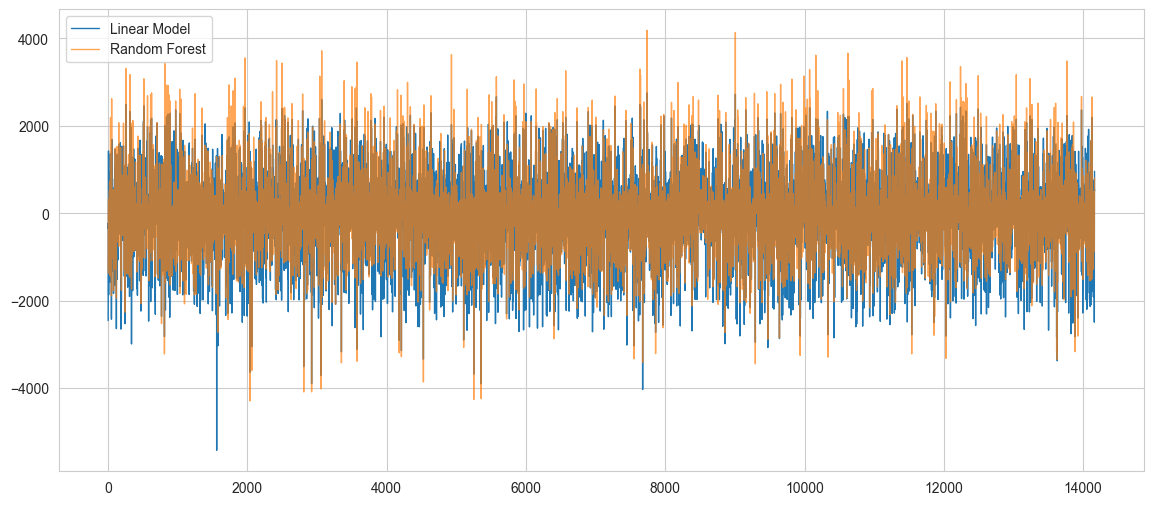

In [45]:
residuos_lm = ytest - pred_lm
residuos_rf = ytest - pred_rf
plt.figure(figsize = (14,6))
plt.plot(range(len(ytest)), residuos_lm, label = 'Linear Model', linewidth = 1)
plt.plot(range(len(ytest)), residuos_rf, label = 'Random Forest', linewidth = 1, alpha = 0.7)
plt.legend()
plt.show();

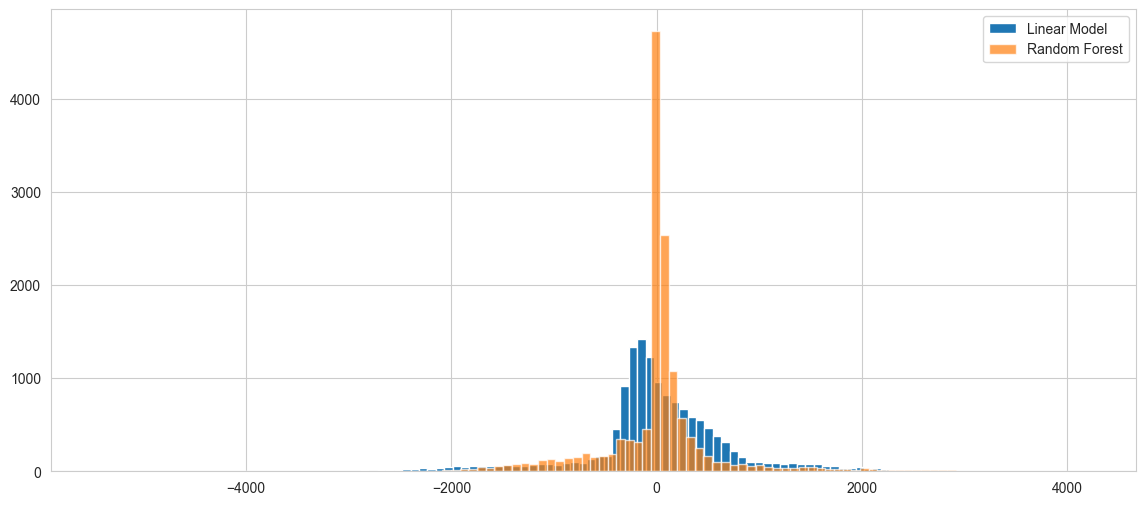

In [46]:
plt.figure(figsize = (14,6))
plt.hist(residuos_lm, label = 'Linear Model', linewidth = 1, bins = 100)
plt.hist(residuos_rf, label = 'Random Forest', linewidth = 1, alpha = 0.7, bins = 100)
plt.legend()
plt.show();

### Interpretando os Gráficos Acima
Ambos os gráficos estão usando os resíduos dos modelos, que representam a taxa de erro.
- **Gráfico 1:** O modelo Random Forest apresentou menos erros do que o modelo Linear Regression.
- **Gráfico 2:** O modelo Random Forest possui a maior parte dos erros próximos de 0, já o modelo Linear Regression tem a taxa de erros um pouco mais distribuída.

### **Observação:**

 A taxa de erro do Random Forest (que foi o melhor modelo) está em aproximadamente 1 ano e meio, portanto o modelo não cosegue prever exatamente quanto tempo o paciente ficará vivo após a cirurgia, mas sim dar uma estimativa com margem de erro e 1 ano e meio.

 Tecticamente esse é um bom sinal, pois a mergem de erro é bem menor do que a média do tempo que as pessoas sobrevivem depois do transplante. O erro é de aproximadamente 600 dias, enquanto a média é de aproximadamente 1600 dias. Porém, como eu falei, **tecnicamente isso é um bom sinal**, não necessariamente isso é literalmente um bom sinal.

É nesses casos que o auxílio da área de negócios da empresa ganha valor, pois são eles que dirão se a margem de erro é razoável, ou não.

---
### Encontrando as Variáveis mais Relevantes

In [47]:
selector = RFE(LinearRegression(), n_features_to_select=10, step = 1)
selector.fit(xtrain, ytrain)
columns = ds2.columns[ds2.columns != 'PTIME']
melhores_variaveis = columns[selector.support_]

In [48]:
rf_2 = RandomForestRegressor()
rf_2.fit(xtrain[melhores_variaveis], ytrain)
pred_rf_2 = rf_2.predict(xtest[melhores_variaveis])
mse_rf_2 = mean_squared_error(ytest, pred_rf_2)
rmse_rf_2 = np.sqrt(mse_rf_2)
r2_rf_2 = r2_score(ytest, pred_rf_2)
mse_rf_2, rmse_rf_2, r2_rf_2

(406199.7146119255, 637.3379908744853, 0.7935050291198976)

#### **Nota:**
Neste segundo modelo Random Forest, observe que o **r2** diminuiu um pouco (isso é ruim), e o **erro** aumentou um pouco (outro sinal ruim). Porém desta vez o modelo foi treinado com apenas 10 variáveis, quando antes tinha sido treinado com todas as 44 variáveis. Isso indica que, por mais que o modelo aparentemente ficou levemente pior, agora ele está bem menos complexo do que o modelo anterior e com uma performance bem semelhante (no final das contas, isso é bom).

---
### Recriando o último modelo para fazer previsões

In [49]:
final_scaler = StandardScaler()
final_scaler.fit(ds2[melhores_variaveis])
ds_final_scaled = final_scaler.transform(ds2[melhores_variaveis])
ds_final_scaled = pd.DataFrame(ds2[melhores_variaveis], columns = melhores_variaveis)
ds_final_scaled['PTIME'] = ds2['PTIME']

In [50]:
x = ds_final_scaled[melhores_variaveis]
y = ds_final_scaled['PTIME']
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x, y, test_size = 0.2)
xtrain2.shape, xtest2.shape, ytrain2.shape, ytest2.shape

((56650, 10), (14163, 10), (56650,), (14163,))

In [51]:
xtrain2

,PSTATUS,PX_STAT,AGE,TX_Year,AGE_DON,WGT_KG_DON_CALC,WGT_KG_CALC,LISTYR,LiverSize,LiverSizeDon
22918,1,1,55,2009,39,102.0,68.9,2009,1780.966,2514.340
34386,0,0,51,2011,23,100.0,76.9,2011,1959.926,2688.220
54273,0,0,66,2016,26,100.3,80.7,2015,1827.598,2654.422
64281,0,0,46,2017,36,82.1,74.8,2017,1990.752,2235.714
55904,0,0,48,2016,28,72.5,115.5,2016,2613.790,2185.570
...,...,...,...,...,...,...,...,...,...,...
18761,1,1,55,2008,60,79.8,108.6,2008,2413.784,1890.412
44645,0,0,62,2015,35,88.9,99.9,2013,2185.086,2356.966
37558,0,0,54,2012,47,68.0,92.7,2012,2173.198,1869.500
35444,1,1,59,2012,50,85.7,79.4,2012,1896.896,2113.058


In [52]:
rf_final = RandomForestRegressor()
rf_final.fit(xtrain2, ytrain2)
pred_rf_final = rf_final.predict(xtest2)
mse_rf_final = mean_squared_error(ytest2, pred_rf_final)
rmse_rf_final = np.sqrt(mse_rf_final)
r2_rf_final = r2_score(ytest2, pred_rf_final)
mse_rf_final, rmse_rf_final, r2_rf_final

(403644.82268318866, 635.3304830426356, 0.7916098878272039)

### Ilustração da Árvore de Decisão
Abaixo eu tentei mostrar uma das Árvores de Decisão criada no treinamento do modelo Random Forest, porém, como a imagem ficou muito grande, não foi possível mostrar aqui no Jupyter. Mas ela está disponível no arquivo 'arvore_de_decisao.svg' aqui neste repositório, abra o arquivo no navegador (talves demorará um pouco para carregar, pois a imagem realmente é muito grande) e então você poderá ver a árvore de decisão.

**Nota:** O código abaixo está comentado porque demorou cerca de 28:14 minutos para renderizar a imagem da árvore de decisão, por isso salvei a imagem em svg, para que não precise demorar 28 min toda vez que eu executar este jupyter, basta eu carregar a imagem svg já salva.

In [53]:
# import graphviz
# from sklearn import tree
# random_estimator = np.random.randint(len(rf_final.estimators_))
# random_estimator = rf_final.estimators_[random_estimator]

# tree.export_graphviz(random_estimator,
#                       out_file='./arvore_de_decisao.dot', feature_names=melhores_variaveis)

# with open('./arvore_de_decisao.dot') as file:
#     graph = file.read()
#     viz = graphviz.Source(graph)
# viz.render('arvore_de_decisao', format='svg')

## Fazendo Previsões com o Melhor Modelo
---
As 10 Variáveis usadas para treinar o modeo são:
- PSTATUS
- PX_STAT
- AGE
- TX_Year
- AGE_DON
- WGT_KG_DON_CALC
- WGT_KG_CALC
- TX_MELD
- LiverSize
- LiverSizeDon

Portanto abaixo irei criar alguns valores fictícios para cada uma dessas variáveis, padronizá-las (pois o modelo foi treinado com dados padronizados) e ver qual será a previsão do modelo.

In [54]:
novos_dados = [0, 1, 32, 2023, 25, 78, 55, 0, 1583.448, 2036.555]
novos_dados = np.array(novos_dados).reshape(1,10)
novos_dados = final_scaler.transform(novos_dados)
novos_dados

array([[-6.03774619e-01,  1.67618864e+00, -2.27430600e+00,
         2.62805230e+00, -9.76259824e-01, -1.60424566e-01,
        -1.50100629e+00, -4.70040586e+02, -1.32355337e+00,
        -3.23450363e-01]])

In [55]:
previsao = rf_final.predict(novos_dados)
previsao, previsao / 365

(array([2913.9]), array([7.98328767]))

Com base nos dados inseridos, o modelo prevui que uma pessoa de 32 anos que possía doença hepática e fez um transplante de fígado por causa disso em 2023, que sobreviveu à cirurgia, possuindo um fígado de tamanho 1583.448 e recebendo um fígado de tamanho 2036.555, viverá por aproximadamente 2742 dias (7 anos e meio) após a cirurgia. 

Lembrando que o modelo possui uma taxa de erro de aproximadamente 1 ano e meio, portanto seria prudente consigerar um tempo de vida entre 6 anos à 9 anos.

---
## Conclusão do Projeto
Como visto, consegui cumprir nosso objetivo (se isso foi o suficiente ou não, cabe à área de negócios decidir e me dar o feedback necessário), mas também foram ressaltados insights potencialmente valiosos durante a análise exploratória.

Portanto agora eu poderei entregar não só o que foi solicitado, mas também apresentar novas visões sobre o cenário que poderão ser de grande ajuda.

---
Se você que acompanhou o projeto possui um negócio e considerou que este é um processo relevante para uma empreza, sinta-se confortável para <a href = "https://www.linkedin.com/in/bruno-valero/" target = "_blank">entrar em contato a qualquer momento</a>.

E se você é alguém que está estudando ou namorando esta área da ciência de dados, espero que este projeto tenha sido esclarecedor, <a href = "https://www.linkedin.com/in/bruno-valero/" target = "_blank">entre em contato para algum comentário, sugestão ou dúvida</a>.